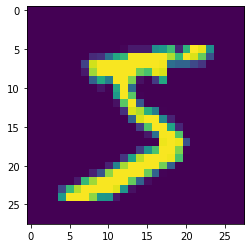

In [1]:
#@markdown 載入MNIST資料
from tensorflow import keras
from matplotlib import pyplot as plt
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

plt.imshow(x_train[0])

In [2]:
#@markdown 資料預處理
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train / 255.0
x_test = x_test / 255.0

In [3]:
#@markdown 建立模型
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
# Dense: x * w + b
model.add(Dense(256, activation = 'relu', input_shape = (784,)))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(10))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


In [4]:
#@markdown 訓練神經網路
from tensorflow.keras.losses import SparseCategoricalCrossentropy
loss_fn = SparseCategoricalCrossentropy(from_logits=True)

model.compile(optimizer='sgd',
       loss=loss_fn,
       metrics=['accuracy'])
model.fit(x_train, y_train, 
    epochs=5, batch_size = 256,
    validation_data = (x_test, y_test))

Epoch 1/5
235/235 [==============================] - 3s 12ms/step - loss: 1.5949 - accuracy: 0.6078 - val_loss: 0.9294 - val_accuracy: 0.8091
Epoch 2/5
235/235 [==============================] - 3s 11ms/step - loss: 0.7160 - accuracy: 0.8348 - val_loss: 0.5460 - val_accuracy: 0.8644
Epoch 3/5
235/235 [==============================] - 3s 11ms/step - loss: 0.5048 - accuracy: 0.8687 - val_loss: 0.4343 - val_accuracy: 0.8837
Epoch 4/5
235/235 [==============================] - 3s 11ms/step - loss: 0.4256 - accuracy: 0.8850 - val_loss: 0.3802 - val_accuracy: 0.8957
Epoch 5/5
235/235 [==============================] - 3s 11ms/step - loss: 0.3830 - accuracy: 0.8946 - val_loss: 0.3503 - val_accuracy: 0.9018


In [5]:
#@markdown 檢視模型參數
model.get_weights()[0]

array([[ 0.05994482,  0.06124961, -0.05692293, ...,  0.00625271,
         0.01937528, -0.07058074],
       [ 0.05519925,  0.07535307,  0.0292355 , ...,  0.00047046,
        -0.00720945, -0.00116774],
       [ 0.01967245,  0.00324795, -0.00221717, ..., -0.06419246,
         0.03110179, -0.01718106],
       ...,
       [-0.07350729,  0.06650227, -0.01896512, ..., -0.05152155,
        -0.06347677,  0.00932804],
       [ 0.05872527, -0.01350743,  0.07304108, ...,  0.00521869,
         0.01080064,  0.02053613],
       [-0.00625276,  0.0703622 , -0.04307812, ...,  0.05544233,
        -0.03720701,  0.06678911]], dtype=float32)

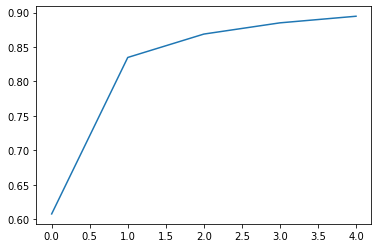

In [6]:
#@markdown 檢視精準度變化
plt.plot(range(len(model.history.history['accuracy'])), model.history.history['accuracy'])

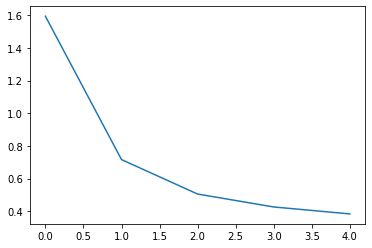

In [7]:
#@markdown 檢視Loss變化
plt.plot(range(len(model.history.history['loss'])), model.history.history['loss'])